Fetching files from drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1lClKCRILD0AwA0p_iwcizl4ernv3OMRC/Final_Project/E:


Importing libraries

In [2]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
import random
from tensorflow.keras import layers, models
from tensorflow.keras.layers import UpSampling2D,Input,LeakyReLU,MaxPooling2D,Dropout,Lambda,add,Activation,Concatenate,Dense,Flatten,Conv2D
#from keras.utils import plot_model
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


Functions Definitions

In [3]:
def Take_Syllables(Syllable_name,Data,Labels):
    ind = Labels == Syllable_name
    Syllables = Data[ind]
    return Syllables

def print_loss(hist):
    plt.figure()
    plt.plot(hist.history['loss'], 'r', hist.history['val_loss'], 'b')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.title('Model loss function', fontsize=18)
    plt.legend(['Training loss','Validation loss'])
    plt.figure()
    plt.plot(hist.history['accuracy'], 'r', hist.history['val_accuracy'], 'b')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title('Model accuracy', fontsize=18)
    plt.legend(['Training accuracy','Validation accuracy'])

Loading Data

In [4]:
%cd /content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/
Data_united = np.load('Data_united_128.npy',allow_pickle = True)
Labels_united = np.load('Labels_united_18072021.npy',allow_pickle = True)



Complex_syl = Take_Syllables('Complex',Data_united,Labels_united)
Frequency_steps_syl = Take_Syllables('Frequency Steps',Data_united,Labels_united)
Chevron_syl = Take_Syllables('Chevron',Data_united,Labels_united)
Composite_syl = Take_Syllables('Composite',Data_united,Labels_united)
#Noise_syl = Take_Syllables('99.0',Data_united,Labels_united)
two_syllable_syl = Take_Syllables('Two-Syllable',Data_united,Labels_united)
upward_syl = Take_Syllables('Upward',Data_united,Labels_united)
flat_syl = Take_Syllables('Flat',Data_united,Labels_united)
short_syl = Take_Syllables('Short',Data_united,Labels_united)
harmonics_syl = Take_Syllables('Harmonics',Data_united,Labels_united)
downward_syl = Take_Syllables('Downward',Data_united,Labels_united)



/content/drive/.shortcut-targets-by-id/1lClKCRILD0AwA0p_iwcizl4ernv3OMRC/Final_Project/E:


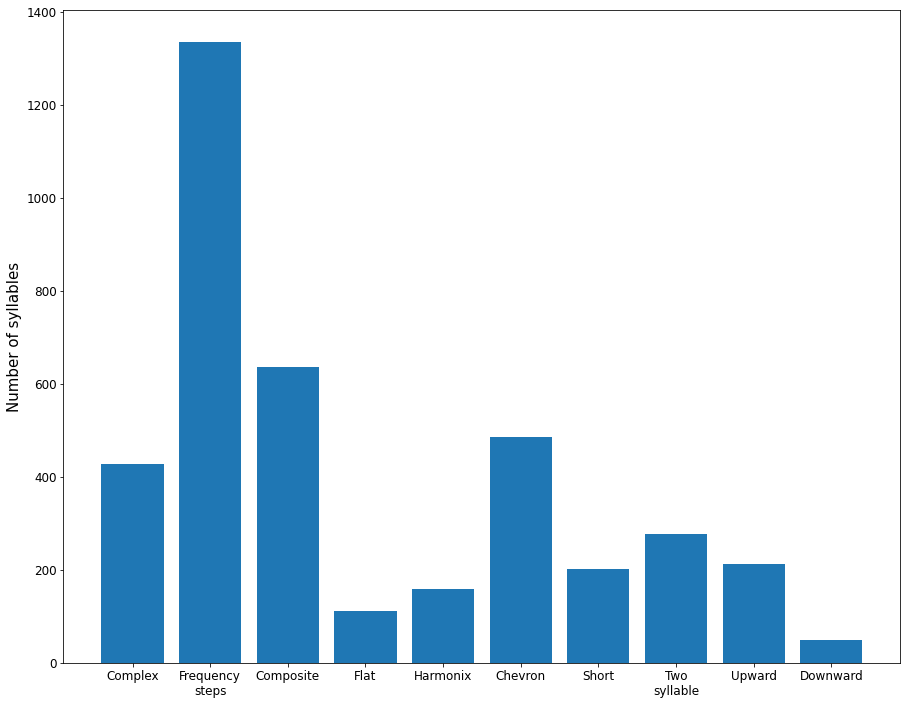

In [7]:
Labels = ['Complex', 'Frequency\nsteps', 'Composite', 'Flat', 'Harmonix', 'Chevron', 'Short', 'Two\nsyllable', 'Upward', 'Downward']
Values = [len(Complex_syl), len(Frequency_steps_syl), len(Composite_syl), len(flat_syl), len(harmonics_syl), len(Chevron_syl), len(short_syl), len(two_syllable_syl), len(upward_syl), len(downward_syl)]
fig = plt.figure(figsize=(15, 12))
plt.bar(Labels, Values)#, width=0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Number of syllables', fontsize=15)
#plt.title('Distribution of syllable types in corrected dataset', fontsize=15)
fig.savefig('/content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/bar_syl_poster.png', bbox_inches="tight", pad_inches=0)